## Model Training

In [1]:
# https://www.analyticsvidhya.com/blog/2023/04/student-performance-analysis-and-prediction/

### 1.1 Import Data and Required Packages
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [8]:
y = df['math_score']

In [9]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [11]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [12]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Square Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Square Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Absolute Error: 4.2676
- Mean Squared Error: 28.3502
- Root Mean Square Error: 5.3245
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Mean Absolute Error: 4.2154
- Mean Squared Error: 29.1074
- Root Mean Square Error: 5.3951
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Mean Absolute Error: 5.2063
- Mean Squared Error: 43.4784
- Root Mean Square Error: 6.5938
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Mean Absolute Error: 5.1579
- Mean Squared Error: 42.5064
- Root Mean Square Error: 6.5197
- R2 Score: 0.8253


K-Neighbors Regressor
Model performance for Training set
- Mean Absolute Error: 4.5167
- Mean Squared Error: 32.5776
- Root Mean Square Error: 5.7077
- R2 Score: 0.8555
----------------------------------
Model performance for Test set
- Mean Absolute Error: 5.6210
- Mean Squared Error: 52.6066
- Root Mean Square Error: 7

### Model Selection

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)),
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],
                                                             ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.880383
6,CatBoosting Regressor,0.851632
4,Random Forest Regressor,0.850185
7,AdaBoost Regressor,0.847243
1,Lasso,0.825320
5,XGBRegressor,0.821589
2,K-Neighbors Regressor,0.783813
3,Decision Tree,0.741307


### Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {
    'Linear Regression': {},
    'Lasso': {'alpha': [1]},
    'K-Neighbors Regressor': {'n_neighbors': [3, 5, 7],},
    'Decision Tree': {'max_depth': [3, 5, 7],
                      'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    'Random Forest Regressor': {'n_estimators': [8,16,32,64,128,256],
                                'max_depth': [3, 5, 7]},
    'Gradient Boosting': {'learning_rate':[.1,.01,.05,.001],
                          'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                          'n_estimators': [8,16,32,64,128,256]},
    'XGBRegressor': {'depth': [6,8,10],
                     'learning_rate': [0.01, 0.05, 0.1],
                     'iterations': [30, 50, 100]},
    'CatBoosting Regressor': {'iterations': [100, 500],
                              'depth': [3, 5, 7]},
    'AdaBoost Regressor': {'learning_rate':[.1,.01,0.5,.001],
                           'n_estimators': [8,16,32,64,128,256]}
}

model_list = []
r2_list =[]

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid[model_name], 
        scoring=scorer, 
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train) 
    # Make predictions 
    y_train_pred = grid_search.predict(X_train) 
    y_test_pred = grid_search.predict(X_test) 
    # Evaluate Train and Test dataset 
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred) 
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 
    print(model_name) 
    model_list.append(model_name) 
    
    print('Best hyperparameters:', grid_search.best_params_) 
    print('Model performance for Training set') 
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse)) 
    print('- Mean Squared Error: {:.4f}'.format(model_train_mse)) 
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae)) 
    print('- R2 Score: {:.4f}'.format(model_train_r2)) 
    print('----------------------------------') 
    print('Model performance for Test set') 
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse)) 
    print('- Mean Squared Error: {:.4f}'.format(model_test_rmse)) 
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae)) 
    print('- R2 Score: {:.4f}'.format(model_train_r2))
    r2_list.append(model_test_r2) 
    print('=' * 35)
    print('\n')

Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 5.3245
- Mean Squared Error: 28.3502
- Mean Absolute Error: 4.2676
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3951
- Mean Squared Error: 5.3951
- Mean Absolute Error: 4.2154
- R2 Score: 0.8742


Lasso
Best hyperparameters: {'alpha': 1}
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8071


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 7}
Model performance for Training set
- Root Mean Squared Error: 5.9103
- Mean Squared Error: 34.9318
- Mean Absolute Error: 4.7195
- R2 Score: 0.8451
----------------------------------
Model performa

### Model Selection

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)),
             columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],
                                                             ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.880383
6,CatBoosting Regressor,0.874602
5,XGBRegressor,0.863174
4,Random Forest Regressor,0.861354
7,AdaBoost Regressor,0.852791
1,Lasso,0.825320
3,Decision Tree,0.824230
2,K-Neighbors Regressor,0.790980


### Linear Regression

In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X=X_train, y=y_train)
y_pred = lin_model.predict(X=X_test)
score = r2_score(y_true=y_test, y_pred=y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


### Plot y_pred and y_test

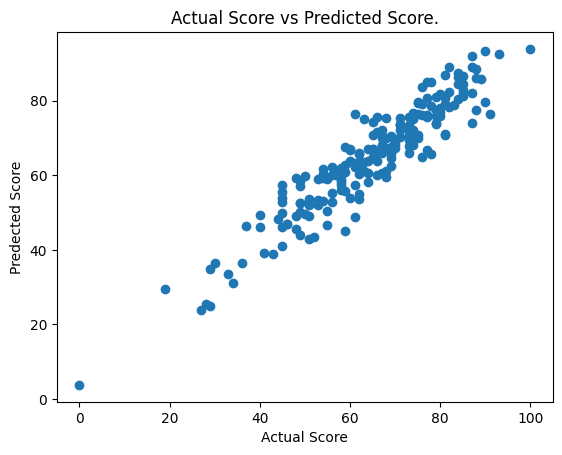

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predected Score')
plt.title('Actual Score vs Predicted Score.')
plt.show()

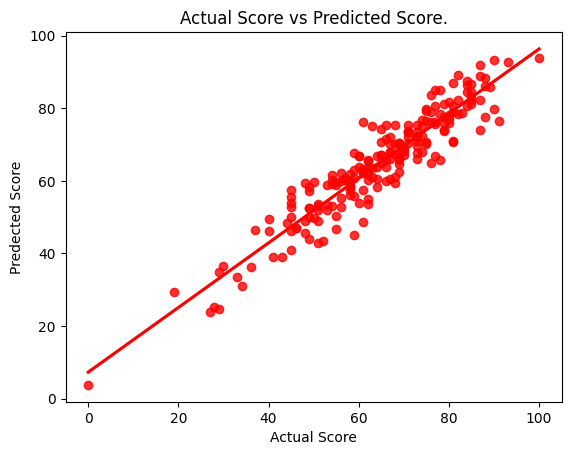

In [24]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='red')
plt.xlabel('Actual Score')
plt.ylabel('Predected Score')
plt.title('Actual Score vs Predicted Score.')
plt.show()

### Difference between Actual and Predicted Values

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.500000,14.500000
737,53,58.945312,-5.945312
740,80,76.953125,3.046875
660,74,76.757812,-2.757812
411,84,87.531250,-3.531250
...,...,...,...
408,52,43.546875,8.453125
332,62,62.015625,-0.015625
208,74,67.968750,6.031250
613,65,67.132812,-2.132812


### Convert the Model to Pickle File

In [26]:
# # loading library
# import pickle
# # create an iterator object with write permission - model.pkl
# with open('model_pkl', 'wb') as files:
#     pickle.dump(model, files)
    
# # load saved model
# with open('model_pkl' , 'rb') as f:
#     lr = pickle.load(f) 